## Анализ продаж видеоигр (поиск инсайтов, составление рекомендаций стейкхолдерам)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('ВидеоИгры.xlsx')

### Описание датасета

Файл содержит данные об играх, платформах, на которых они были выпущены и количестве продаж по регионам. Ниже указаны столбцы и описание их содержимого.

    Наименование - наименование игры
    Год релиза- год, в котором выпущена игра в первый раз
    Платформа - платформа, на которой выпущена игра
    Жанр - жанр игры
    Издатель - издатель игры
    NA_Sales - количество продаж в North America в миллионах штук
    EU_Sales - количество продаж в European Union в миллионах штук
    JP_Sales - количество продаж в Japan в миллионах штук
    Other_Sales - количество продаж в остальном мире в миллионах штук
    Global_Sales - количество продаж во всем мире в миллионах штук
    Оценка критиков - средняя оценка критиков
    Кол-во критиков - количество критиков, на основе которых посчитана средняя
    Оценка пользователей - средняя оценка пользователей
    Кол-во пользователей - количество пользователей, на основе которых посчитана средняя
    Разработчик - разработчик игры
    Рейтинг - рейтинг игры

Посмотрим как выглядят наши данные

In [3]:
df.head()

,Наименование,Платформа,Год релиза,Жанр,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей,Разработчик,Рейтинг
0,Wii Sports,Wii,2006.0,Спортивные игры,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Платформеры,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Гонки,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Спортивные игры,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Ролевые,Nintendo,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим сколько у нас строк и колонок, какие типы данных, сколько пропущенных значений

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Наименование          16717 non-null  object 
 1   Платформа             16719 non-null  object 
 2   Год релиза            16450 non-null  float64
 3   Жанр                  16717 non-null  object 
 4   Издатель              16665 non-null  object 
 5   NA_Sales              16719 non-null  float64
 6   EU_Sales              16719 non-null  float64
 7   JP_Sales              16719 non-null  float64
 8   Other_Sales           16719 non-null  float64
 9   Global_Sales          16719 non-null  float64
 10  Оценка критиков       8137 non-null   float64
 11  Кол-во критиков       8137 non-null   float64
 12  Оценка пользователей  10015 non-null  object 
 13  Кол-во пользователей  7590 non-null   float64
 14  Разработчик           10096 non-null  object 
 15  Рейтинг            

15 колонок и 16719 строк  
Во многих колонках есть пропущенные значения. В некоторых колонках их немного, а в некоторых даже больше половины  
В колонке "Оценка пользователей" содержатся данные типа "object", надо перевести во "float64" для возможности проведения расчетов   

Сколько пропущенных значений в каждой колонке?

In [5]:
print('Наименование - ', len(df.loc[df['Наименование'].isnull()]))
print('Платформа - ', len(df.loc[df['Платформа'].isnull()]))
print('Год релиза - ', len(df.loc[df['Год релиза'].isnull()]))
print('Жанр - ', len(df.loc[df['Жанр'].isnull()]))
print('Издатель - ', len(df.loc[df['Издатель'].isnull()]))
print('NA_Sales - ', len(df.loc[df['NA_Sales'].isnull()]))
print('EU_Sales - ', len(df.loc[df['EU_Sales'].isnull()]))
print('JP_Sales - ', len(df.loc[df['JP_Sales'].isnull()]))
print('Other_Sales - ', len(df.loc[df['Other_Sales'].isnull()]))
print('Global_Sales - ', len(df.loc[df['Global_Sales'].isnull()]))
print('Оценка критиков - ', len(df.loc[df['Оценка критиков'].isnull()]))
print('Кол-во критиков - ', len(df.loc[df['Кол-во критиков'].isnull()]))
print('Оценка пользователей - ', len(df.loc[df['Оценка пользователей'].isnull()]))
print('Кол-во пользователей - ', len(df.loc[df['Кол-во пользователей'].isnull()]))
print('Разработчик - ', len(df.loc[df['Разработчик'].isnull()]))
print('Рейтинг - ', len(df.loc[df['Рейтинг'].isnull()]))

Наименование -  2
Платформа -  0
Год релиза -  269
Жанр -  2
Издатель -  54
NA_Sales -  0
EU_Sales -  0
JP_Sales -  0
Other_Sales -  0
Global_Sales -  0
Оценка критиков -  8582
Кол-во критиков -  8582
Оценка пользователей -  6704
Кол-во пользователей -  9129
Разработчик -  6623
Рейтинг -  6769


Посмотрим на уникальные значения в столбце "Оценка пользователей"

In [6]:
df['Оценка пользователей'].unique()

array([8, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9, 7.9, 8.1,
       8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2, 7,
       7.3, 4.3, 7.6, 5.7, 5, 9.1, 6.5, 'tbd', 8.8, 6.9, '9', 9.4, 6.8,
       6.1, '8', 6.7, 5.4, '4', 4.9, 4.5, 9.3, 6.2, 4.2, '6', 3.7, '7',
       4.1, 5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, '5', 3.3,
       4.7, 5.1, 3.5, 2.5, 1.9, '3', 2.7, 2.2, '2', 9.5, 2.1, 3.6, 2.8,
       1.8, 3.8, '0', 1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3,
       0.5, 1.3, 0.2, 0.6, 1.4, 0.9, '1', 9.7], dtype=object)

In [7]:
len(df.loc[df['Оценка пользователей'] == 'tbd'])

2425

Видим, что кроме строк с пропущенными значениями и числовыми есть так же 2425 строк, в которых указано "tbd".
TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.
Вероятно это означает, что данной игре пользователь оценку ещё не поставил, можно перевести эти значения в NaN чтобы можно было считать различные показатели по столбцу

В столбцах Оценка критиков, Кол-во критиков, Оценка пользователей, Кол-во пользователей, Разработчик, Рейтинг очень много 
пропущенных значений. Пропущенные данные в числовых колонка вряд ли имеет смысл заменять средним, медийной или ещё какими-то показателями, поэтому просто не будем их учитывать

Переведем tdb в None

In [8]:
df = df.replace('tbd', np.nan)
df['Оценка пользователей'].unique()

array([8, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9, 7.9, 8.1,
       8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2, 7,
       7.3, 4.3, 7.6, 5.7, 5, 9.1, 6.5, 8.8, 6.9, '9', 9.4, 6.8, 6.1, '8',
       6.7, 5.4, '4', 4.9, 4.5, 9.3, 6.2, 4.2, '6', 3.7, '7', 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, '5', 3.3, 4.7, 5.1,
       3.5, 2.5, 1.9, '3', 2.7, 2.2, '2', 9.5, 2.1, 3.6, 2.8, 1.8, 3.8,
       '0', 1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3,
       0.2, 0.6, 1.4, 0.9, '1', 9.7], dtype=object)

Теперь можно заменить типы значений в столбце "Оценка пользователей" на float64 и посмотреть статистики по числовым столбцам

In [9]:
df['Оценка пользователей'] = pd.to_numeric(df['Оценка пользователей'])
df.describe()

,Год релиза,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533229,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547885,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.540000,98.000000,113.000000,9.700000,10665.000000


Видим, что критики ставили оценки по 100-бальной школе, а пользователи по 10-бальной. Приведем оценки пользователей к 100-бальной школе, чтобы их можно было сравнивать

In [10]:
df['Оценка пользователей'] = df['Оценка пользователей'] * 10

In [11]:
df.describe()

,Год релиза,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533229,68.967679,26.360821,71.250461,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547885,13.938165,18.980495,15.000061,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,64.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,75.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,82.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.540000,98.000000,113.000000,97.000000,10665.000000


Что видим?
- Больше всего продаж приходится на Северную Америку, на втором месте Европа, на третьем Япония
- В среднем пользователи ставять оценки немного более высокие, чем критики, но разница совсем небольшая

### Анализ

Попробуем сгруппировать данные по различным параметрам (по жанру, году релиза, издателю и т.п.)

Для начала посмотрим данные по продажам в разрезе по годам 

In [12]:
df_grouped_year = df.groupby('Год релиза').sum()
df_grouped_year[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Год релиза,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.68
1982.0,26.92,1.65,0.00,0.31,28.88
1983.0,7.76,0.80,8.10,0.14,16.80
1984.0,33.28,2.10,14.27,0.70,50.35
1985.0,33.73,4.74,14.56,0.92,53.95
1986.0,12.50,2.84,19.81,1.93,37.08
1987.0,8.46,1.41,11.63,0.20,21.70
1988.0,23.87,6.59,15.76,0.99,47.21


Видим, что нету данных за 2018 и 2019 годы, а с данными за 2017 и 2020 годы явно есть какие-то проблемы, их совсем мало, посмотрим подробнее

In [29]:
df_2017_2020 = df[(df['Год релиза'] == 2017) | (df['Год релиза'] == 2020)]
df_2017_2020

,Наименование,Платформа,Год релиза,Жанр,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей,Разработчик,Рейтинг
5936,Imagine: Makeup Artist,DS,2020.0,Симуляторы,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,NaN,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Ролевые,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Ролевые,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Экшен,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


За 2017 и 2020 годы есть данные только по 4 играм, поэтому не будем учитывать эти данные при анализе

In [14]:
df_grouped_year = df.loc[(df['Год релиза'] != 2017)]

In [15]:
df_grouped_year = df_grouped_year.loc[(df_grouped_year['Год релиза'] != 2020)]

In [16]:
df_grouped_year['Год релиза'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Убрали из датафрейма данные за 2017 и 2020 года

Сгруппируем данные по продажам по годам

In [17]:
df_grouped_year = df_grouped_year.groupby('Год релиза').sum()
df_grouped_year = df_grouped_year[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].reset_index()
df_grouped_year

,Год релиза,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,10.59,0.67,0.00,0.12,11.38
1,1981.0,33.40,1.96,0.00,0.32,35.68
2,1982.0,26.92,1.65,0.00,0.31,28.88
3,1983.0,7.76,0.80,8.10,0.14,16.80
4,1984.0,33.28,2.10,14.27,0.70,50.35
5,1985.0,33.73,4.74,14.56,0.92,53.95
6,1986.0,12.50,2.84,19.81,1.93,37.08
7,1987.0,8.46,1.41,11.63,0.20,21.70
8,1988.0,23.87,6.59,15.76,0.99,47.21
9,1989.0,45.15,8.44,18.36,1.50,73.45


На основе оставшихся данных можем посмотреть динамику продаж по годам

Text(0, 0.5, 'Продажи, млн.')

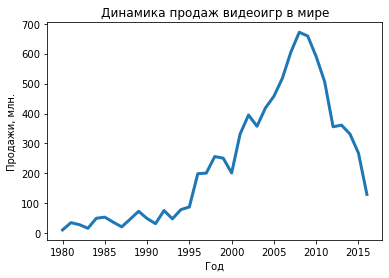

In [18]:
plt.plot(df_grouped_year['Год релиза'], df_grouped_year['Global_Sales'], linewidth=3)
plt.title('Динамика продаж видеоигр в мире')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.')

С 1980 по 1995 продажи постепенно росли. Начиная с 1995 года начался резкий рост продаж, вплоть до 2007-2008 годов. Поле этого началось падение продаж. Вероятно это связано с развитием интернета. Появилась возможность покупать игры онлайн или скачивать с различных неофициальных ресурсов бесплатно. 

Сгруппируем данные по жанрам и отсортируем по уровню продаж в мире

In [20]:
df_grouped_genre = df.groupby('Жанр').sum()
df_grouped_genre = df_grouped_genre[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].reset_index()
df_grouped_genre = df_grouped_genre.sort_values(by='Global_Sales', ascending=False)
df_grouped_genre

,Жанр,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11,Экшен,879.01,519.13,161.44,184.60,1744.18
7,Спортивные игры,684.43,376.79,135.54,134.51,1331.27
10,Шутеры,592.24,317.34,38.76,104.11,1052.45
5,Ролевые,330.81,188.71,355.46,59.63,933.61
2,Платформеры,445.50,200.35,130.83,51.09,827.77
4,Разное,407.27,212.74,108.11,74.39,802.51
0,Гонки,359.35,236.51,56.71,76.10,728.67
9,Файтинг,223.36,100.33,87.48,36.36,447.53
6,Симуляторы,182.19,113.52,63.80,30.75,390.26
1,Паззлы,122.87,50.01,57.31,12.38,242.57


Построим столбчатую диаграмму по продаже разных жанров игр

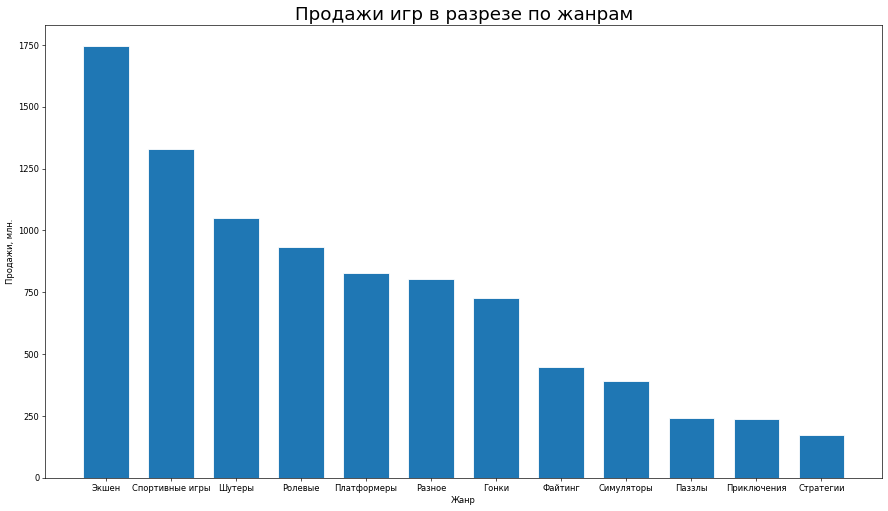

In [21]:
x = df_grouped_genre['Жанр']
y = df_grouped_genre['Global_Sales']

fig, ax = plt.subplots(figsize=(18,10), dpi=60)
ax.bar(x, y, width=0.7, edgecolor="white", linewidth=1)
ax.set_title('Продажи игр в разрезе по жанрам', fontdict={'size':22})
plt.ylabel('Продажи, млн.') 
plt.xlabel('Жанр') 

plt.show()

На диаграмме видим показатели по продаже игр в мире в зависимости от жанра. Наиболее популярные жанры: экшен, спортивные иры, шутеры. Наименее популярные жанры: стратегии, приключения, паззлы. Для стейкхолдеров эта информация может быть полезна с точки зрения оценки перспективности разных жанров игр.

Проведем анализ продаж разных издателей игр

In [24]:
len(df['Издатель'].unique())

582

Всего у нас есть 582 издателя. Посмотрим какие из них конкурируют друг с другом в зависимости от жанра игры

### Экшен

Для начала возьмем жанр "экшен" как самый популярный. 
Сделаем отдельный датафрейм с играми только этого жанра

In [25]:
df_action = df[(df['Жанр'] == 'Экшен')]
df_action.head()

,Наименование,Платформа,Год релиза,Жанр,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей,Разработчик,Рейтинг
16,Grand Theft Auto V,PS3,2013.0,Экшен,Take-Two Interactive,7.02,9.09,0.98,3.96,21.05,97.0,50.0,82.0,3994.0,Rockstar North,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Экшен,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,90.0,1588.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Экшен,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,81.0,3711.0,Rockstar North,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Экшен,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,87.0,730.0,Rockstar North,M
38,Grand Theft Auto III,PS2,2001.0,Экшен,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97.0,56.0,85.0,664.0,DMA Design,M


In [26]:
len(df_action)

3370

In [27]:
len(df_action['Издатель'].unique())

236

Всего у на есть 3370 игр в жанре экшен и 236 издателей, которые их выпускают

Сгруппируем датафрейм по издателю, чтобы получить данные по продажам каждого издателя игр в жанре "экшен". Отсортируем данные по уровню продаж в мире

In [28]:
df_grouped_action = df_action.groupby('Издатель').sum()
df_grouped_action = df_grouped_action.reset_index()
df_grouped_action = df_grouped_action[['Издатель', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df_grouped_action = df_grouped_action.sort_values(by='Global_Sales', ascending=False)
df_grouped_action

,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
204,Take-Two Interactive,102.55,71.85,4.50,34.85,213.75
214,Ubisoft,69.88,54.67,2.12,16.93,143.60
10,Activision,86.89,38.78,1.08,13.62,140.37
153,Nintendo,63.26,29.10,29.31,6.22,127.89
225,Warner Bros. Interactive Entertainment,58.45,42.99,1.02,14.49,116.95
...,...,...,...,...,...,...
150,NetRevo,0.00,0.00,0.01,0.00,0.01
124,LEGO Media,0.00,0.01,0.00,0.00,0.01
76,Focus Home Interactive,0.00,0.01,0.00,0.00,0.01
77,Focus Multimedia,0.00,0.01,0.00,0.00,0.01


По этим данным мы можем понять какие издатели игр в жанре "экшен" являются друг для друга главными конкурентами. Логичнее всего сравнивать друг с другом те компании, которые находятся примерно на одном уровне продаж и дополнительно сравнивать с лидерами индустрии. Выделим лидеров в данном сегменте игр, например топ-10 и вынесем их на диаграмму

In [141]:
df_grouped_action_10 = df_grouped_action.head(10)
df_grouped_action_10

,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
204,Take-Two Interactive,102.55,71.85,4.50,34.85,213.75
214,Ubisoft,69.88,54.67,2.12,16.93,143.60
10,Activision,86.89,38.78,1.08,13.62,140.37
153,Nintendo,63.26,29.10,29.31,6.22,127.89
225,Warner Bros. Interactive Entertainment,58.45,42.99,1.02,14.49,116.95
66,Electronic Arts,54.15,43.41,2.49,14.47,114.52
185,Sony Computer Entertainment,46.28,29.53,3.97,14.39,94.17
200,THQ,54.09,24.53,1.94,7.79,88.35
42,Capcom,35.89,20.02,22.58,6.46,84.95
123,Konami Digital Entertainment,30.46,19.19,12.54,8.40,70.59


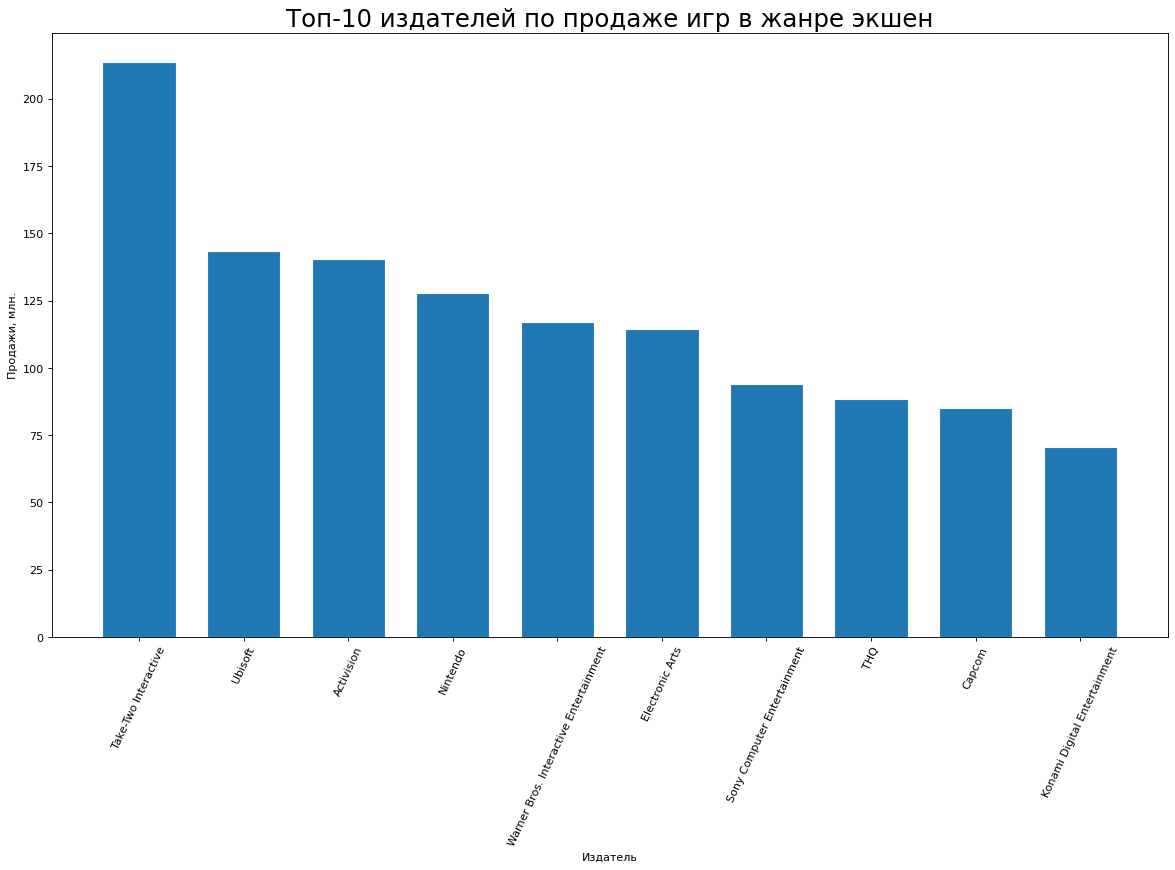

In [142]:
x = df_grouped_action_10['Издатель']
y = df_grouped_action_10['Global_Sales']

fig, ax = plt.subplots(figsize=(18,10), dpi=80)
ax.bar(x, y, width=0.7, edgecolor="white", linewidth=1)
ax.set_title('Топ-10 издателей по продаже игр в жанре экшен', fontdict={'size':22})
plt.ylabel('Продажи, млн.') 
plt.xlabel('Издатель') 
plt.xticks(rotation=65)

plt.show()

### Спортивные игры

По аналогии проведем анализ игр в жанре "Спортивные игры". Сделаем отдельный датафрейм с играми только этого жанра

In [30]:
df_sport = df[(df['Жанр'] == 'Спортивные игры')]
df_sport. head()

,Наименование,Платформа,Год релиза,Жанр,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Оценка критиков,Кол-во критиков,Оценка пользователей,Кол-во пользователей,Разработчик,Рейтинг
0,Wii Sports,Wii,2006.0,Спортивные игры,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,80.0,322.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Спортивные игры,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Спортивные игры,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,77.0,146.0,Nintendo,E
15,Wii Fit Plus,Wii,2009.0,Спортивные игры,Nintendo,9.01,8.49,2.53,1.77,21.80,80.0,33.0,74.0,52.0,Nintendo,E
77,FIFA 16,PS4,2015.0,Спортивные игры,Electronic Arts,1.12,6.12,0.06,1.28,8.58,82.0,42.0,43.0,896.0,EA Sports,E


In [31]:
len(df_sport)

2348

In [32]:
len(df_sport['Издатель'].unique())

165

Всего у на есть 2348 спортивных игр и 165 издателей, которые их выпускают. Сгруппируем данные по издателю и посмотрим рейтинг продаж

In [123]:
df_grouped_sport = df_sport.groupby('Издатель').sum()
df_grouped_sport = df_grouped_sport.reset_index()
df_grouped_sport = df_grouped_sport[['Издатель', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df_grouped_sport = df_grouped_sport.sort_values(by='Global_Sales', ascending=False)
df_grouped_sport

,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
51,Electronic Arts,271.71,148.47,3.32,58.43,481.93
106,Nintendo,98.19,65.89,35.89,17.09,217.06
83,Konami Digital Entertainment,9.52,30.54,44.47,14.45,98.98
139,Take-Two Interactive,55.87,13.91,0.29,8.70,78.77
10,Activision,52.73,17.44,0.13,5.42,75.72
...,...,...,...,...,...,...
20,Athena,0.02,0.00,0.00,0.00,0.02
59,FuRyu Corporation,0.02,0.00,0.00,0.00,0.02
40,DSI Games,0.02,0.00,0.00,0.00,0.02
76,"Interworks Unlimited, Inc.",0.01,0.00,0.00,0.00,0.01


Как и с играми в жанре "Экшен" можем на основе этих данных понять какие компании друг для друга являются конкурентами. Выделим топ-10

In [133]:
df_grouped_sport_10 = df_grouped_sport.head(10)
df_grouped_sport_10

,Издатель,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
51,Electronic Arts,271.71,148.47,3.32,58.43,481.93
106,Nintendo,98.19,65.89,35.89,17.09,217.06
83,Konami Digital Entertainment,9.52,30.54,44.47,14.45,98.98
139,Take-Two Interactive,55.87,13.91,0.29,8.70,78.77
10,Activision,52.73,17.44,0.13,5.42,75.72
123,Sega,25.55,28.06,9.75,7.59,70.95
126,Sony Computer Entertainment,32.06,13.04,8.86,5.64,59.60
149,Ubisoft,14.38,7.19,0.08,2.11,23.76
103,Namco Bandai Games,3.91,1.45,13.19,0.49,19.04
7,Acclaim Entertainment,13.13,3.96,0.00,0.90,17.99


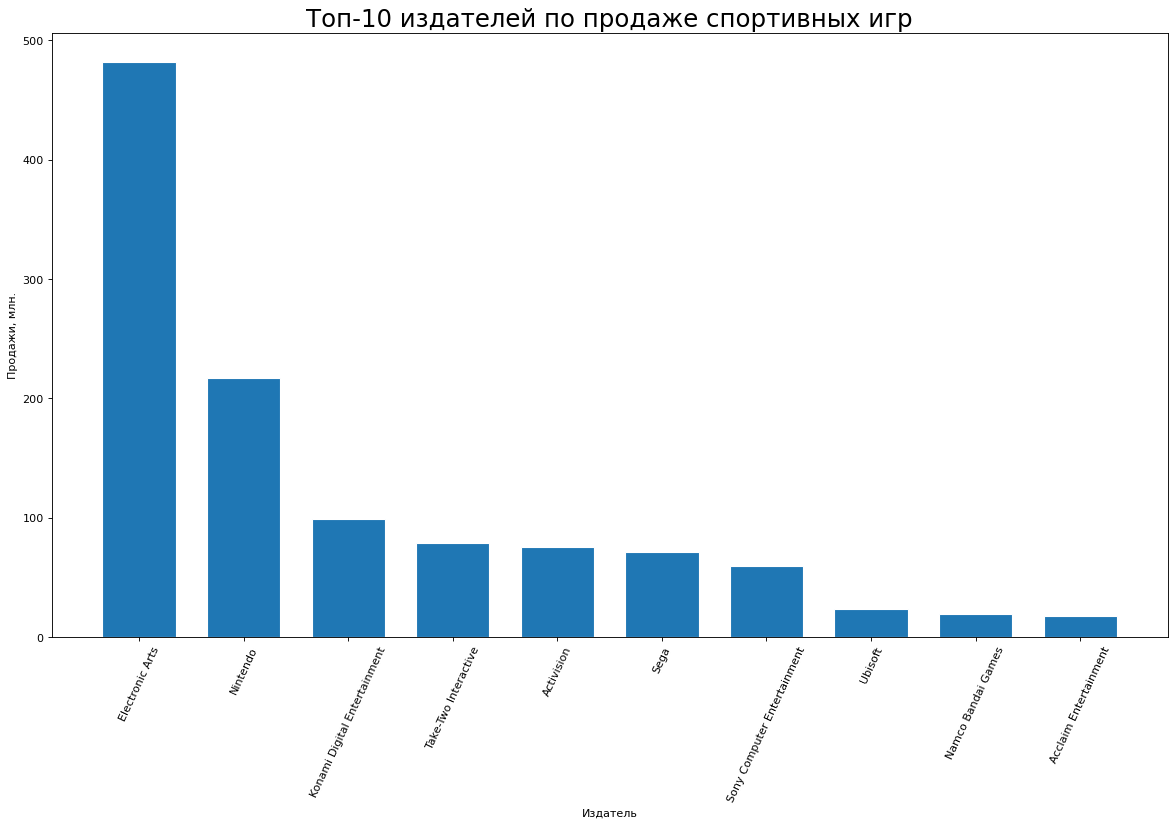

In [134]:
x = df_grouped_sport_10['Издатель']
y = df_grouped_sport_10['Global_Sales']

fig, ax = plt.subplots(figsize=(18,10), dpi=80)
ax.bar(x, y, width=0.7, edgecolor="white", linewidth=1)
ax.set_title('Топ-10 издателей по продаже спортивных игр', fontdict={'size':22})
plt.ylabel('Продажи, млн.') 
plt.xlabel('Издатель') 
plt.xticks(rotation=65)

plt.show()

Можем сделать вывод, что в продаже спортивных игр два главных конкурента на мировом рынке: Electronic Arts и Nintendo. При этом Electronic Arts продает в 2 раза больше, чем Nintendo

Далее примерно на одном уровне по продажам находятся: Konami Digital Entertainment, Take-Two Interactive, Activision, Sega и Sony Computer Entertainment. Можно считать этих издателей основными конкурентами друг для друга

Аналогичный анализ можно сделать по всем остальным жанрам. В рамках каждого жанра составить рейтинг издателей по продажам, как во всём мире, так и отдельно по регионам. На основе этого можно выделить для каждой компании-издателя его основных конкурентов (с кем конкурируют по продажам конкретных жанров игр)